PROJECT: NO-SHOW APPOINTMENT ANALYSIS

TABLE OF CONTENT
1. Introduction 
2. Data Wrangling
3. Exploratory Data Analysis 
4. Conclusion
5. Limitation
6. Resources

INTRODUCTION

An analysis to determine the reasons patients may not show up for their medical appointment.

DATASET DESCRIPTION

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. It contains 110.527 medical appointments and 14 associated variables that explains reason why patients miss their appointment(patient id, appointment id, gender, age, scheduled day, appointment day, diabetes, hipertension, alcholism, handcap, neighbourhood, scholarship, sms received and no show)

‘ScheduledDay’ tells us on what day the patient set up their appointment.
‘Neighborhood’ indicates the location of the hospital.
‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família. 
'No show' indicates whether or not the patient showed up. It reads ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.
    
QUESTION(S) FOR ANALYSIS

1. What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?
Different factors determine the willingness of a patient to show up for their medical appointment, each factor would determine what the hospital would take into consideration.
2. Does the type of disease determine whether a patient would show up for their appointment? 
This is because the seriousness of a disease may encourage patients to show up for their appointment, seriousness in terms of how deadly or malignant the disease may be.
3. Is there a relationsip between the gender of the patient and whether they would show up for their appointment?
Gender is a major factor contributing to decision making and in this context, the decision whether they would show up for their medical appointment or not.



In [2]:
#Import relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

UsageError: Line magic function `%` not found.


DATA WRANGLING

Here, I checked the general properties of the data, the first five rows, data types, number of rows and columns, summary statistics and if there is any missing value and duplicates.

In [5]:
#I checked the first five rows 
df= pd.read_csv('noshowappointments.csv')
df.head()

PatientId  AppointmentID Gender          ScheduledDay  \
0  2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1  5.589978e+14        5642503      M  2016-04-29T16:08:27Z   
2  4.262962e+12        5642549      F  2016-04-29T16:19:04Z   
3  8.679512e+11        5642828      F  2016-04-29T17:29:31Z   
4  8.841186e+12        5642494      F  2016-04-29T16:07:23Z   

         AppointmentDay  Age      Neighbourhood  Scholarship  Hipertension  \
0  2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0             1   
1  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             0   
2  2016-04-29T00:00:00Z   62      MATA DA PRAIA            0             0   
3  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI            0             0   
4  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             1   

   Diabetes  Alcoholism  Handcap  SMS_received No-show  
0         0           0        0             0      No  
1         0           0        0             0      No  
2         0           0        0             0      No  
3         0           0        0             0      No  
4         1           0        0             0      No

In [6]:
#I checked the number of rows and columns
df.shape

(110527, 14)

In [7]:
#I checked the summary statistics
df.describe()

PatientId  AppointmentID            Age    Scholarship  \
count  1.105270e+05   1.105270e+05  110527.000000  110527.000000   
mean   1.474963e+14   5.675305e+06      37.088874       0.098266   
std    2.560949e+14   7.129575e+04      23.110205       0.297675   
min    3.921784e+04   5.030230e+06      -1.000000       0.000000   
25%    4.172614e+12   5.640286e+06      18.000000       0.000000   
50%    3.173184e+13   5.680573e+06      37.000000       0.000000   
75%    9.439172e+13   5.725524e+06      55.000000       0.000000   
max    9.999816e+14   5.790484e+06     115.000000       1.000000   

        Hipertension       Diabetes     Alcoholism        Handcap  \
count  110527.000000  110527.000000  110527.000000  110527.000000   
mean        0.197246       0.071865       0.030400       0.022248   
std         0.397921       0.258265       0.171686       0.161543   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       4.000000   

        SMS_received  
count  110527.000000  
mean        0.321026  
std         0.466873  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         1.000000  
max         1.000000

In [8]:
#I checked the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [9]:
#I checked if there is any missing value
df.isnull().sum().any()

False

In [10]:
#I checked if there is there are duplicates
df.duplicated().any()

False

DATA CLEANING

Here, I dropped the cells not needed(scheduledday, scholarship and smsreceived). I also lowered the column names and properly labelled them, making them easy to use.

In [11]:
#I dropped the scheduled day, scholarship and sms received columns
df.drop(['ScheduledDay', 'Scholarship', 'SMS_received'], axis=1, inplace=True)
df.head()

PatientId  AppointmentID Gender        AppointmentDay  Age  \
0  2.987250e+13        5642903      F  2016-04-29T00:00:00Z   62   
1  5.589978e+14        5642503      M  2016-04-29T00:00:00Z   56   
2  4.262962e+12        5642549      F  2016-04-29T00:00:00Z   62   
3  8.679512e+11        5642828      F  2016-04-29T00:00:00Z    8   
4  8.841186e+12        5642494      F  2016-04-29T00:00:00Z   56   

       Neighbourhood  Hipertension  Diabetes  Alcoholism  Handcap No-show  
0    JARDIM DA PENHA             1         0           0        0      No  
1    JARDIM DA PENHA             0         0           0        0      No  
2      MATA DA PRAIA             0         0           0        0      No  
3  PONTAL DE CAMBURI             0         0           0        0      No  
4    JARDIM DA PENHA             1         1           0        0      No

In [16]:
#I made the column names lower case and properly cleaned them
df.rename(columns=lambda x:x.strip().lower().replace("-","_"), inplace=True)

In [17]:
df.rename(columns=lambda x:x.replace("id","_id"), inplace=True)

In [18]:
df.rename(columns=lambda x:x.replace("day","_day"), inplace=True)

In [19]:
df.head()

patient_id  appointment_id gender       appointment_day  age  \
0  2.987250e+13         5642903      F  2016-04-29T00:00:00Z   62   
1  5.589978e+14         5642503      M  2016-04-29T00:00:00Z   56   
2  4.262962e+12         5642549      F  2016-04-29T00:00:00Z   62   
3  8.679512e+11         5642828      F  2016-04-29T00:00:00Z    8   
4  8.841186e+12         5642494      F  2016-04-29T00:00:00Z   56   

       neighbourhood  hipertension  diabetes  alcoholism  handcap no_show  
0    JARDIM DA PENHA             1         0           0        0      No  
1    JARDIM DA PENHA             0         0           0        0      No  
2      MATA DA PRAIA             0         0           0        0      No  
3  PONTAL DE CAMBURI             0         0           0        0      No  
4    JARDIM DA PENHA             1         1           0        0      No

EXPLORATORY DATA ANALYSIS

Here, I visualized the data set. I visualized the independent variable to know the number of patient that showed up and did not show up for their appointment. I also plotted a countplot showing the gender that showed up or did not show up for their appointment. Lastly, I visualized using a countplot the number of people who have hypertension, diabetes, alcoholism or who are handicap that showed up or did not show up for their appointment.

mean        std
no_show                      
No       37.790064  23.338878
Yes      34.317667  21.965941

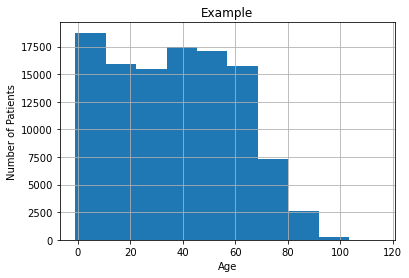

In [31]:
#I visualized the age column
ax= df['age'].hist()
ax.set_ylabel('Number of Patients')
ax.set_xlabel('Age')
ax.set_title('Example')
df.groupby(['no_show'])['age'].describe().loc[:,['mean','std']]

Histograms depict the distribution of continuous feature, in the case age. This shows that majority of patient are between the age 20-80 and the hishest number od patient are between the age 0-10. This tend to answer the first question posed above.

no_show    110527
dtype: int64

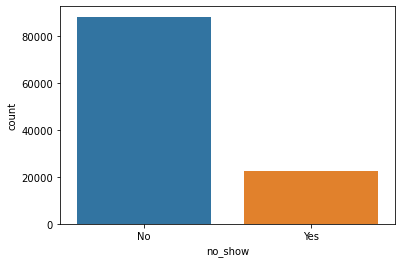

In [33]:
#I visualized the no show column
sns.countplot(x='no_show',data=df)
df[['no_show']].count()

A countplot shows the count feature of a categorical variable, in this case no_show. This reveals that the number of people that showed up compared people that didn't, about 20% did not show up.

no_show
gender         
F         71840
M         38687

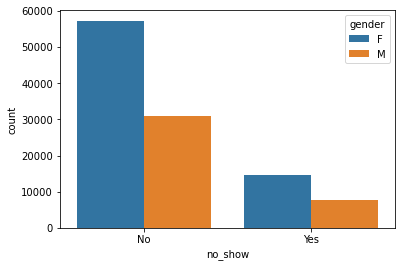

In [28]:
#I visualized the gender column against the no show column
sns.countplot(x='no_show',hue='gender',data=df)
df.groupby(['gender'])[['no_show']].count()

This depicts the count distribution for two categorical variables, gender and no_show. This shows that more female did not show up compared to male. This tend to answer the second question posed above.

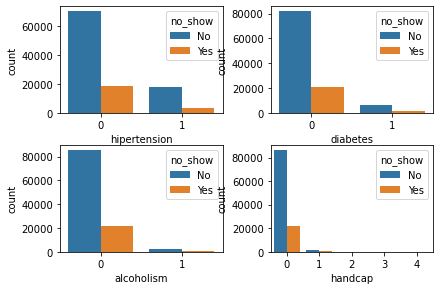

In [30]:
#I visualized the hipertension, diabetes, alcoholism and handcap columns
fig, axes=plt.subplots(2,2)
plt.tight_layout()
sns.countplot(data=df, x='hipertension', ax=axes[0,0], hue='no_show')
sns.countplot(data=df, x='diabetes', ax=axes[0,1], hue='no_show')
sns.countplot(data=df, x='alcoholism', ax=axes[1,0], hue='no_show')
sns.countplot(data=df, x='handcap', ax=axes[1,1], hue='no_show')
plt.show()

This countplot shows that relationship bwtween the diseases and no_show. This tend to answer the third question posed above.

CONCLUSION

In analyzing this dataset, we visualized different variables showing the distribution and correlation between each different variables.

From the visualization, it is clear that more female did not show up for their appointment compared to male. It is also clear that more people with serious diseases such as hipetension and diabetes showed up for their appointment compared to people with alcoholism and people that are handicapped.

Therefore, the visualisation answers the questions posed above. It can be inferred that one reason why people do not show up is because the nature of their disease is not so serious and in need of urgent attention. Therefore, the type of disease determine whether people show up for their appointment. Also, gender is a major factor influencing patient showing up for their appointment. Females tend to miss their appointment more than men maybe because it is generally known that female run a tighter schedule than men and maybe because men take their health more seriously than women.

LIMITATION

The limitation in this data set is that there are so many unique values in the columns such as in the patient id, age, neighbourhood columns making it difficult to visualize without using summary statistics, and working with summary statistics could give room for outliers. I feel an additional data about the distance of the location of the hospital's to the patient's would be useful for the analysis.

RESOURCES

1.	W3schools
2.	Datacamp
3.	https://stackoverflow.com/questions/65051101/how-to-compare-two-categorical-variable-using-seaborn